<a href="https://colab.research.google.com/github/ianstewart17/Ian-Stewart-Projects/blob/main/Ian_Stewart_Spotify_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

In my final project I'll be working with Spotify API and compile a database on a number of artists. The database will include song information, album information, artist information, and song features. In this project i will use a number of functions that are built into the API to extract the data to then compile into my database.

### To first start off my project I need to connect to the API using my credentials then download the spotify library. I also need to import pandas and JSON_normalize to use throughout my notebook.

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)

Mounted at /content/mnt


In [ ]:
!pip install --target=$nb_path spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spotipy-2.23.0-py3-none-any.whl (29 kB)
  Using cached redis-4.5.4-py3-none-any.whl (238 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

spotify_client_id = '3b3ae176e17049378f9b15ce95806257'
spotify_client_secret  = 'cfa0b56ca4b94d33b81de90d0eba7b63'

client_credentials_manager = SpotifyClientCredentials(
    client_id=spotify_client_id,
    client_secret=spotify_client_secret
)

sp = spotipy.Spotify(
    client_credentials_manager=client_credentials_manager
)

In [ ]:
import pandas as pd
from pandas.io.json import json_normalize

# Data exploration

In the data exploration section I will use a couple of functions from the spotify libray to see whatkind of data is returned.

The functions I'm going to use:


*   sp.artist()
*   sp.artist_albums() can either be used to get info on singles and albums
*   sp.artist_related artists()
*   sp.artist_top_tracks()
*   sp.audio_features()

for all the above functions sp.audio_features() you have to input an artists URI as an argument for the function to return the information for that specific artist. For the audio features you need a ID for a specific track. For the exploration I will focus on one specific artist to see what we can find. I will then later expand to using multiple artist.

## Artist for exploration: Kendrick Lamar

URI: '2YZyLoL8N0Wb9xBt1NhZWg'

In [ ]:
# First off using the sp.artist() function to get information
kendrick = sp.artist('2YZyLoL8N0Wb9xBt1NhZWg')

In [ ]:
#calling the function to see what it returns
kendrick

{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
 'followers': {'href': None, 'total': 23756591},
 'genres': ['conscious hip hop', 'hip hop', 'rap', 'west coast rap'],
 'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
 'id': '2YZyLoL8N0Wb9xBt1NhZWg',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb437b9e2a82505b3d93ff1022',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174437b9e2a82505b3d93ff1022',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178437b9e2a82505b3d93ff1022',
   'width': 160}],
 'name': 'Kendrick Lamar',
 'popularity': 89,
 'type': 'artist',
 'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}

As you can see above when working with the spotify API what is returned is in JSON format. What is helpful when working with JSON is to familiarize yourself with the keys within the data. We do this through the use of the .keys() function.

In [ ]:
# using the .keys() function
kendrick.keys()

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])

In [ ]:
# we can now find specific information like artist popularity score
kendrick['popularity']

89

In [ ]:
# or the number of followers
kendrick['followers']['total']

23756591

In [ ]:
# the id associated with kendrick lamar
kendrick['id']

'2YZyLoL8N0Wb9xBt1NhZWg'

Knowing what information is returned and how to find specific information will be useful when compiling the database. Next I'm going to explore what data we get when using sp.artist_albums(), I will look at the singles and albums of Kendrick Lamar.

In [ ]:
# getting the albums
albums = sp.artist_albums('2YZyLoL8N0Wb9xBt1NhZWg', album_type = 'album')

In [ ]:
# calling albums to look at the data
albums

{'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg/albums?offset=0&limit=20&include_groups=album',
 'items': [{'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
     'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
     'id': '2YZyLoL8N0Wb9xBt1NhZWg',
     'name': 'Kendrick Lamar',
     'type': 'artist',
     'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES

Looking at the data from albums you can see that there is more here data than the information. This amount will very on the artist because not everyone has the same number of albums. You could also look at the keys like we did above to see what keys are within the data.

In [ ]:
# looking at the keys
albums.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

I'm not totally familiar where the information we want lies so lets explore what the keys have to offer.

In [ ]:
# looking at the data in limit
albums['limit']

20

In [ ]:
# looking at the data in items
albums['items']

[{'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
    'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
    'id': '2YZyLoL8N0Wb9xBt1NhZWg',
    'name': 'Kendrick Lamar',
    'type': 'artist',
    'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH'

It seems that all the information we want to use for our database lies in the items key. This is where we will get all the data going forward. Next I will use the same function but look at the singles of Kendrick Lamar.

In [ ]:
#  getting data on singles
singles = sp.artist_albums('2YZyLoL8N0Wb9xBt1NhZWg', album_type = 'single')

In [ ]:
# calling singles
singles

{'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg/albums?offset=0&limit=20&include_groups=single',
 'items': [{'album_group': 'single',
   'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
     'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
     'id': '2YZyLoL8N0Wb9xBt1NhZWg',
     'name': 'Kendrick Lamar',
     'type': 'artist',
     'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    

As we can see the singles data follows the same format as the albums data. This is useful to see becasue we can follow the same process when extracting data to create the dataset. Next I'm going to look at what artist are seen as related to kendrick lamar. You do this by using sp.artist_related_artists()

In [ ]:
# realted artist data
related_artists = sp.artist_related_artists('2YZyLoL8N0Wb9xBt1NhZWg')

In [ ]:
# calling realted artists
related_artists

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5IcR3N7QB1j6KBL8eImZ8m'},
   'followers': {'href': None, 'total': 4475044},
   'genres': ['gangster rap',
    'hip hop',
    'pop rap',
    'rap',
    'southern hip hop',
    'trap'],
   'href': 'https://api.spotify.com/v1/artists/5IcR3N7QB1j6KBL8eImZ8m',
   'id': '5IcR3N7QB1j6KBL8eImZ8m',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab6761610000e5ebe697a7ddf7af3a306428fa73',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/ab67616100005174e697a7ddf7af3a306428fa73',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/ab6761610000f178e697a7ddf7af3a306428fa73',
     'width': 160}],
   'name': 'ScHoolboy Q',
   'popularity': 73,
   'type': 'artist',
   'uri': 'spotify:artist:5IcR3N7QB1j6KBL8eImZ8m'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/0ONHkAv9pCAFxb0zJwDNTy'},
   'followers': {'href': None, 'total': 2748098},
 

When using this function it returns the same data as sp.artist() but for a nmber of artists seen as realted to the artists that you inputted into the function. This will be useful for later becasue I'm going to use all the realted artist information to start collecting data for my final dataset. For this final part of exploring the functions I will be using, I'm going to look at what is returned by the sp.artist_top_tracks() function then choose a song to look at the audio features. To look at the audio features I will use the sp.audio_features() function.

In [ ]:
# getting data for top 10 tracks
top_tracks = sp.artist_top_tracks('2YZyLoL8N0Wb9xBt1NhZWg')

In [ ]:
top_tracks

{'tracks': [{'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
      'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
      'id': '2YZyLoL8N0Wb9xBt1NhZWg',
      'name': 'Kendrick Lamar',
      'type': 'artist',
      'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/6PBZN8cbwkqm1ERj2BGXJ1'},
    'href': 'https://api.spotify.com/v1/albums/6PBZN8cbwkqm1ERj2BGXJ1',
    'id': '6PBZN8cbwkqm1ERj2BGXJ1',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273d28d2ebdedb220e479743797',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02d28d2ebdedb220e479743797',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851d28d2ebdedb220e479743797',
      'width': 64}],
    'is_playable': 

In [ ]:
#look at keys of top_tracks
top_tracks.keys()

dict_keys(['tracks'])

In [ ]:
# looking at the first song that is returned
top_tracks['tracks'][0]

{'album': {'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
    'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
    'id': '2YZyLoL8N0Wb9xBt1NhZWg',
    'name': 'Kendrick Lamar',
    'type': 'artist',
    'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}],
  'external_urls': {'spotify': 'https://open.spotify.com/album/6PBZN8cbwkqm1ERj2BGXJ1'},
  'href': 'https://api.spotify.com/v1/albums/6PBZN8cbwkqm1ERj2BGXJ1',
  'id': '6PBZN8cbwkqm1ERj2BGXJ1',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b273d28d2ebdedb220e479743797',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e02d28d2ebdedb220e479743797',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d00004851d28d2ebdedb220e479743797',
    'width': 64}],
  'is_playable': True,
  'name': 'good kid, m.A.A.d city',
  'release

After looking at what is returned for top_tracks we see that it contains a lot of data and that we can get data for specific songs within the origianl data. The data from the top tracks resembles that from the singles. Now I'm going to extract the ID for the first song from top_tracks and use that ID to see the audio features.

In [ ]:
# making the song ID a variable
money_trees = top_tracks['tracks'][0]['id']

In [ ]:
# look at what is returned
money_trees

'2HbKqm4o0w5wEeEFXm2sD4'

Now that we have the ID for the specific song we can input it intp the audio features function to see what is returned.

In [ ]:
# audio features data    mt for money trees
audio_feat_mt = sp.audio_features(money_trees)

In [ ]:
# calling the function to get the data
audio_feat_mt

[{'danceability': 0.716,
  'energy': 0.531,
  'key': 7,
  'loudness': -7.355,
  'mode': 1,
  'speechiness': 0.122,
  'acousticness': 0.0703,
  'instrumentalness': 0,
  'liveness': 0.224,
  'valence': 0.344,
  'tempo': 71.994,
  'type': 'audio_features',
  'id': '2HbKqm4o0w5wEeEFXm2sD4',
  'uri': 'spotify:track:2HbKqm4o0w5wEeEFXm2sD4',
  'track_href': 'https://api.spotify.com/v1/tracks/2HbKqm4o0w5wEeEFXm2sD4',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2HbKqm4o0w5wEeEFXm2sD4',
  'duration_ms': 386907,
  'time_signature': 4}]

Looking at what is returned we see that it is information on the song like danceability and tempo. This data is useful for a number of reasons and I will later make a dataset of audio tracks of a number of songs from a number of different artists.

## Exploring json_normalize()

json_normalize() will take the JSON data that we got from calling the functions above and turn it into a dataframe. There is a lot of cleaning that has to be done as you will see soon to turn it into the proper format that you want. To demonstrate I will normalize the albums information

In [ ]:
# normalizng albums
pd.json_normalize(albums)

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,"[{'album_group': 'album', 'album_type': 'album...",20,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,0,None,32


See that it returns only one set of data based on the keys of the data. To get the data we want lets try to normalize albums['items']

In [ ]:
# normalizing albums['items']
pd.json_normalize(albums['items'])

,album_group,album_type,artists,available_markets,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri,external_urls.spotify
0,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",https://api.spotify.com/v1/albums/79ONNoS4M9tf...,79ONNoS4M9tfIA1mYLBYVX,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Mr. Morale & The Big Steppers,2022-05-13,day,19,album,spotify:album:79ONNoS4M9tfIA1mYLBYVX,https://open.spotify.com/album/79ONNoS4M9tfIA1...
1,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",https://api.spotify.com/v1/albums/3OqPkYVDzHKi...,3OqPkYVDzHKistrI9exrjR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Mr. Morale & The Big Steppers,2022-05-12,day,19,album,spotify:album:3OqPkYVDzHKistrI9exrjR,https://open.spotify.com/album/3OqPkYVDzHKistr...
2,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",https://api.spotify.com/v1/albums/3pLdWdkj83EY...,3pLdWdkj83EYfDN6H2N8MR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Black Panther The Album Music From And Inspire...,2018-02-09,day,14,album,spotify:album:3pLdWdkj83EYfDN6H2N8MR,https://open.spotify.com/album/3pLdWdkj83EYfDN...
3,album,album,[{'external_urls': {'spotify': 'https://open.s...,[MX],https://api.spotify.com/v1/albums/4Kp52vGJe5oV...,4Kp52vGJe5oVi0EXNhSDKy,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Black Panther The Album Music From And Inspire...,2018-02-09,day,14,album,spotify:album:4Kp52vGJe5oVi0EXNhSDKy,https://open.spotify.com/album/4Kp52vGJe5oVi0E...
4,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AE, AU, BB, BF, BH, BN, BY, CA, DZ, EG, GH, I...",https://api.spotify.com/v1/albums/5sOSzueqgCiV...,5sOSzueqgCiVpXNcpd6QpL,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Black Panther The Album Music From And Inspire...,2018-02-08,day,14,album,spotify:album:5sOSzueqgCiVpXNcpd6QpL,https://open.spotify.com/album/5sOSzueqgCiVpXN...
5,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",https://api.spotify.com/v1/albums/4alcGHjstaAL...,4alcGHjstaALJHHiljfy3H,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",DAMN. COLLECTORS EDITION.,2017-12-08,day,14,album,spotify:album:4alcGHjstaALJHHiljfy3H,https://open.spotify.com/album/4alcGHjstaALJHH...
6,album,album,[{'external_urls': {'spotify': 'https://open.s...,[MX],https://api.spotify.com/v1/albums/0bDN3eDKOfae...,0bDN3eDKOfaeM5vccGu6SI,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",DAMN. COLLECTORS EDITION.,2017-12-08,day,14,album,spotify:album:0bDN3eDKOfaeM5vccGu6SI,https://open.spotify.com/album/0bDN3eDKOfaeM5v...
7,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",https://api.spotify.com/v1/albums/1LLOGSa5ehwS...,1LLOGSa5ehwSWrPg1Qc3Vg,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",DAMN. COLLECTORS EDITION.,2017-12-08,day,14,album,spotify:album:1LLOGSa5ehwSWrPg1Qc3Vg,https://open.spotify.com/album/1LLOGSa5ehwSWrP...
8,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",https://api.spotify.com/v1/albums/4eLPsYPBmXAB...,4eLPsYPBmXABThSJ821sqY,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",DAMN.,2017-04-14,day,14,album,spotify:album:4eLPsYPBmXABThSJ821sqY,https://open.spotify.com/album/4eLPsYPBmXABThS...
9,album,album,[{'external_urls': {'spotify': 'https://open.s...,[MX],https://api.spotify.com/v1/albums/2ZsOtrjbcxMh...,2ZsOtrjbcxMhcOcyDzNt1V,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",DAMN.,2017-04-14,day,14,album,spotify:album:2ZsOtrjbcxMhcOcyDzNt1V,https://open.spotify.com/album/2ZsOtrjbcxMhcOc...


Once we've done this there it doesn't look that clean, there is data we want that isn't there like the artist name and artist id. we can find this information by using built in features of json_normalize(). I will define a certain path to find the data we wish to extract and then use the argument to seperate using underscores instead of periods.

This will look something like this:

In [ ]:
# getting artist name and id
pd.json_normalize(albums['items'], record_path=['artists'], sep= '_')

,href,id,name,type,uri,external_urls_spotify
0,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...
1,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...
2,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...
3,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...
4,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...
5,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...
6,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...
7,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...
8,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...
9,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...


In [ ]:
pd.json_normalize(albums['items'],
  record_path=['artists'],
  meta = ['id', 'name','release_date',['total_tracks']],
  record_prefix = 'artist_',
  meta_prefix = 'track_',
  sep = '_')

,artist_href,artist_id,artist_name,artist_type,artist_uri,artist_external_urls_spotify,track_id,track_name,track_release_date,track_total_tracks
0,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,79ONNoS4M9tfIA1mYLBYVX,Mr. Morale & The Big Steppers,2022-05-13,19
1,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,3OqPkYVDzHKistrI9exrjR,Mr. Morale & The Big Steppers,2022-05-12,19
2,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,3pLdWdkj83EYfDN6H2N8MR,Black Panther The Album Music From And Inspire...,2018-02-09,14
3,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...,3pLdWdkj83EYfDN6H2N8MR,Black Panther The Album Music From And Inspire...,2018-02-09,14
4,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,4Kp52vGJe5oVi0EXNhSDKy,Black Panther The Album Music From And Inspire...,2018-02-09,14
5,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...,4Kp52vGJe5oVi0EXNhSDKy,Black Panther The Album Music From And Inspire...,2018-02-09,14
6,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,5sOSzueqgCiVpXNcpd6QpL,Black Panther The Album Music From And Inspire...,2018-02-08,14
7,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...,5sOSzueqgCiVpXNcpd6QpL,Black Panther The Album Music From And Inspire...,2018-02-08,14
8,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,4alcGHjstaALJHHiljfy3H,DAMN. COLLECTORS EDITION.,2017-12-08,14
9,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,0bDN3eDKOfaeM5vccGu6SI,DAMN. COLLECTORS EDITION.,2017-12-08,14


Now that we have a dataframe based off of kendricks albums we can store it to kendricks_albums. After that I will clean up the data because we see there is a lot of duplicate information within the data and then use only the columns we want.

In [ ]:
# storing the dataframe
kendricks_albums = pd.json_normalize(albums['items'],
  record_path=['artists'],
  meta = ['id', 'name','release_date',['total_tracks']],
  record_prefix = 'artist_',
  meta_prefix = 'track_',
  sep = '_')

In [ ]:
# calling the dataframe
kendricks_albums

,artist_href,artist_id,artist_name,artist_type,artist_uri,artist_external_urls_spotify,track_id,track_name,track_release_date,track_total_tracks
0,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,79ONNoS4M9tfIA1mYLBYVX,Mr. Morale & The Big Steppers,2022-05-13,19
1,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,3OqPkYVDzHKistrI9exrjR,Mr. Morale & The Big Steppers,2022-05-12,19
2,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,3pLdWdkj83EYfDN6H2N8MR,Black Panther The Album Music From And Inspire...,2018-02-09,14
3,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...,3pLdWdkj83EYfDN6H2N8MR,Black Panther The Album Music From And Inspire...,2018-02-09,14
4,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,4Kp52vGJe5oVi0EXNhSDKy,Black Panther The Album Music From And Inspire...,2018-02-09,14
5,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...,4Kp52vGJe5oVi0EXNhSDKy,Black Panther The Album Music From And Inspire...,2018-02-09,14
6,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,5sOSzueqgCiVpXNcpd6QpL,Black Panther The Album Music From And Inspire...,2018-02-08,14
7,https://api.spotify.com/v1/artists/7tYKF4w9nC0...,7tYKF4w9nC0nq9CsPZTHyP,SZA,artist,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://open.spotify.com/artist/7tYKF4w9nC0nq9...,5sOSzueqgCiVpXNcpd6QpL,Black Panther The Album Music From And Inspire...,2018-02-08,14
8,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,4alcGHjstaALJHHiljfy3H,DAMN. COLLECTORS EDITION.,2017-12-08,14
9,https://api.spotify.com/v1/artists/2YZyLoL8N0W...,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,artist,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...,0bDN3eDKOfaeM5vccGu6SI,DAMN. COLLECTORS EDITION.,2017-12-08,14


In [ ]:
#keeping the columns we want
kendricks_albums = kendricks_albums[['artist_id','artist_name','track_id','track_name','track_release_date','track_total_tracks']]

In [ ]:
# checking to see if the dataframe is what I want it to be
kendricks_albums

,artist_id,artist_name,track_id,track_name,track_release_date,track_total_tracks
0,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,79ONNoS4M9tfIA1mYLBYVX,Mr. Morale & The Big Steppers,2022-05-13,19
1,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,3OqPkYVDzHKistrI9exrjR,Mr. Morale & The Big Steppers,2022-05-12,19
2,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,3pLdWdkj83EYfDN6H2N8MR,Black Panther The Album Music From And Inspire...,2018-02-09,14
3,7tYKF4w9nC0nq9CsPZTHyP,SZA,3pLdWdkj83EYfDN6H2N8MR,Black Panther The Album Music From And Inspire...,2018-02-09,14
4,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,4Kp52vGJe5oVi0EXNhSDKy,Black Panther The Album Music From And Inspire...,2018-02-09,14
5,7tYKF4w9nC0nq9CsPZTHyP,SZA,4Kp52vGJe5oVi0EXNhSDKy,Black Panther The Album Music From And Inspire...,2018-02-09,14
6,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,5sOSzueqgCiVpXNcpd6QpL,Black Panther The Album Music From And Inspire...,2018-02-08,14
7,7tYKF4w9nC0nq9CsPZTHyP,SZA,5sOSzueqgCiVpXNcpd6QpL,Black Panther The Album Music From And Inspire...,2018-02-08,14
8,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,4alcGHjstaALJHHiljfy3H,DAMN. COLLECTORS EDITION.,2017-12-08,14
9,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,0bDN3eDKOfaeM5vccGu6SI,DAMN. COLLECTORS EDITION.,2017-12-08,14


In [ ]:
# look at datatypes of kendricks_albums
kendricks_albums.dtypes

artist_id             object
artist_name           object
track_id              object
track_name            object
track_release_date    object
track_release_date    object
dtype: object

As you can see there is a lot of duplicate information above in the dataframe, I will go more in depth in the cleaning process for my actual data collection. For now I just wanted to demonstrate my process of how I went about exploring what the spotify API has to offer.

# Data Extraction and Transforming

Now that I've shown my exploration process the next step is to actuall extract the data that I want. To start off this process I'm going to make a list of 10 artists URI's that I chose and use the related artist function to then make a new list of a bigger number of artist URI's. This list will be what I run all the functions I used to explore and make different datasets of these artists.


## **Changed from project outline: starting with 10 artists not 5**


## Artist_info

The ten artists I'm going to start off this process will be:

1.   Kendrick Lamar
2.   Green day
3.   The Kid Laroi
4.   Mac Miller
5.   The Beetles
6.   Queen
7.   Drake
8.   Earth, Wind & Fire
9.   Maroon 5
10.  Fleetwood Mac










In [ ]:
# The list of the five URI's to use
og_artists = ['2YZyLoL8N0Wb9xBt1NhZWg', '2tIP7SsRs7vjIcLrU85W8J', '7oPftvlwr6VrsViSDV7fJY', '4LLpKhyESsyAXpc4laK94U', '3WrFJ7ztbogyGnTHbHJFl2', '1dfeR4HaWDbWqFHLkxsg1d', '3TVXtAsR1Inumwj472S9r4', '4QQgXkCYTt3BlENzhyNETg', '04gDigrS5kc9YWfZHwBETP', '08GQAI4eElDnROBrJRGE0X']

In [ ]:
# loop to extract the URI's

related = []

#looping through the ids
for id in og_artists:
  artists_related = sp.artist_related_artists(id)
  #  loop to append the ids of the related artists
  for artist in artists_related['artists']:
    related.append(artist['id'])


In [ ]:
# check the list we have now
print(related)

['5IcR3N7QB1j6KBL8eImZ8m', '0ONHkAv9pCAFxb0zJwDNTy', '13ubrt8QOOCPljQ2FL1Kca', '6l3HvQ5sa6mXTsMTB19rO5', '0g9vAlRPK9Gt3FKCekk4TW', '0c173mlxpT3dSFRgMO8XPh', '0Y4inQK6OespitzD6ijMwb', '3A5tHz1SfngyOZM2gItYKu', '17lzZA2AlOHwCwFALHttmp', '2P5sC9cVZDToPxyomzF1UH', '28ExwzUQsvgJooOI0X1mr3', '2h93pZq0e7k5yf4dywlkpM', '68kEuyFKyqrdQQLLsmiatm', '73sIBHcqh3Z3NyqHKZ7FOL', '6aaMZ3fcfLv4tEbmY7bjRM', '0fA0VVWsXO9YnASrzqfmYu', '67nwj3Y5sZQLl72VNUHEYE', '1anyVhU62p31KFi8MEzkbf', '4V8LLVI7PbaPR0K2TGSxFF', '7yO4IdJjCEPz7YgZMe25iS', '6AgTAQt8XS6jRWi4sX7w49', '5zctI4wO9XSKS8XwcnqEHk', '1cNDP5yjU5vjeR8qMf4grg', '4Ga1P7PMIsmqEZqhYZQgDo', '61qMnYXa1GxSBoV3IiYKjZ', '21WS9wngs9AqFckK7yYJPM', '6ASri4ePR7RlsvIQgWPJpS', '6MPCFvOQv5cIGfw3jODMF0', '0Yr4BBpK2dkCp2UsrJ9LZN', '0vRvGUQVUjytro0xpb26bs', '6fWVd57NKTalqvmjRd2t8Z', '0X3nsc84A9qlFilmlWNwQb', '1MXZ0hsGic96dWRDKwAwdr', '5CiGnKThu5ctn9pBxv7DGa', '3mpOt39mUD754Q7aZ725KH', '1hmTCch4tWOJmdqkf8nSRA', '0OEYE03fBF2VoTBxGuaUxL', '7d3WFRME3vBY2cgoP38RDo', '5G9kmDLg3O

In [ ]:
# adding our artists we started with to our list
for art in og_artists:
  related.append(art)

In [ ]:
# count how many artists we have in our related list
count = 0
for artist in related:
  count +=1
print(count)

210


Now that we have a decent list of artists we can start making our first dataset of artist_information.

The data artist information will contain:
*   Artist ID
*   Artist Name
*   Popularity
*   Followers
*   Genres

I'm going to use a function we were given in a notebook to extract the info but make a minor tweak. I'm going add where it will get the popularity score aswell. We will have to use the map function on the list that we make using the function then convert the mapped object back to a list to become a dataframe.








In [ ]:
# getting artist information function
def get_artist_information(art_id):
  art = sp.artist(art_id)
  artist_name = art['name']
  artist_id = art['id']
  popularity = art['popularity']
  followers = art['followers']['total']
  genre = art['genres'][0] if art['genres'] else None # just taking the first genre for space purposes
  art_list = [artist_name, artist_id, popularity, followers, genre]
  return(art_list)

In [ ]:
# you can look at one of the 105 artist in our list to see what gets returned
get_artist_information(related[10])

['Jay Rock', '28ExwzUQsvgJooOI0X1mr3', 73, 1393157, 'conscious hip hop']

As you can see it returns a list of all the data we want. Now to map so we can start making our dataframe of all the artists.

In [ ]:
# making artist_info
artist_info = map(get_artist_information, related)
artist_info

In [ ]:
# converting to a list
artist_info = list(artist_info)

In [ ]:
# creating the dataframe
artist_info = artist_info = pd.DataFrame(data = artist_info, columns= ['artist_name', 'artist_id', 'popularity', 'followers', 'genre'])


In [ ]:
# looking at our dataframe
artist_info

,artist_name,artist_id,popularity,followers,genre
0,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,73,4476788,gangster rap
1,Pusha T,0ONHkAv9pCAFxb0zJwDNTy,72,2749548,gangster rap
2,A$AP Rocky,13ubrt8QOOCPljQ2FL1Kca,82,12168217,east coast hip hop
3,J. Cole,6l3HvQ5sa6mXTsMTB19rO5,87,19960995,conscious hip hop
4,Ab-Soul,0g9vAlRPK9Gt3FKCekk4TW,59,1023161,conscious hip hop
...,...,...,...,...,...
205,Queen,1dfeR4HaWDbWqFHLkxsg1d,85,46398458,classic rock
206,Drake,3TVXtAsR1Inumwj472S9r4,96,74866165,canadian hip hop
207,"Earth, Wind & Fire",4QQgXkCYTt3BlENzhyNETg,73,3860998,disco
208,Maroon 5,04gDigrS5kc9YWfZHwBETP,86,40360028,pop


Now that we have our dataframe there is some cleaning we need to do, there are some duplicate artists and some artists that don't have genres listed. We will drop those from our dataframe.

In [ ]:
# shape of artist info before drops
artist_info.shape

(210, 5)

In [ ]:
# dropping duplicate artists
artist_info = artist_info.drop_duplicates(subset=['artist_name'])

In [ ]:
# shape after dropping duplicates
artist_info.shape

(183, 5)

We lost about 27 rows but thats ok we still have a good number of artists to work with. Next to drop the artists that don't have any genres labeled.

In [ ]:
# dropping the artists with no genre labeled
artist_info = artist_info.dropna(subset=['genre'])

In [ ]:
# looking at shape of artist_info
artist_info.shape

(180, 5)

In [ ]:
#resetting index
artist_info = artist_info.reset_index(drop=True)


In [ ]:
# final look at the data frame
artist_info

,artist_name,artist_id,popularity,followers,genre
0,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,73,4476788,gangster rap
1,Pusha T,0ONHkAv9pCAFxb0zJwDNTy,72,2749548,gangster rap
2,A$AP Rocky,13ubrt8QOOCPljQ2FL1Kca,82,12168217,east coast hip hop
3,J. Cole,6l3HvQ5sa6mXTsMTB19rO5,87,19960995,conscious hip hop
4,Ab-Soul,0g9vAlRPK9Gt3FKCekk4TW,59,1023161,conscious hip hop
...,...,...,...,...,...
175,Queen,1dfeR4HaWDbWqFHLkxsg1d,85,46398458,classic rock
176,Drake,3TVXtAsR1Inumwj472S9r4,96,74866165,canadian hip hop
177,"Earth, Wind & Fire",4QQgXkCYTt3BlENzhyNETg,73,3860998,disco
178,Maroon 5,04gDigrS5kc9YWfZHwBETP,86,40360028,pop


Seems like there were only three artists that didn't have genres labeled. Now that we have our dataframe made lets look around at some of the data, lets see what artist has the highest popularity score.

In [ ]:
#  looking at the most popular artist in the dataframe
artist_info[artist_info['popularity'] == artist_info['popularity'].max()]

,artist_name,artist_id,popularity,followers,genre
176,Drake,3TVXtAsR1Inumwj472S9r4,96,74866165,canadian hip hop


In [ ]:
# lets see if the artist with the most followers matches the most popular
artist_info[artist_info['followers'] == artist_info['followers'].max()]

,artist_name,artist_id,popularity,followers,genre
176,Drake,3TVXtAsR1Inumwj472S9r4,96,74866165,canadian hip hop


It matches up, it seems that the popularity score is directly linked to the number of followers that the artist has. We can also look at artists that are on the lower end of followers, could be known as 'underground' artists.

In [ ]:
# looking at artists who have less than 500,000 followers
artist_info[artist_info['followers'] <= 500000]

,artist_name,artist_id,popularity,followers,genre
31,Scorey,0X3nsc84A9qlFilmlWNwQb,61,294789,upstate ny rap
34,Unodavid,3mpOt39mUD754Q7aZ725KH,55,41509,melodic rap
35,Chri$tian Gate$,0OEYE03fBF2VoTBxGuaUxL,65,207979,sad rap
47,zebrahead,6SiyKSeJo6gcsS2NvuAbsl,54,318171,funk metal
48,Box Car Racer,0DK7FqcaL3ks9TfFn9y1sD,51,389546,pop punk
50,Goldfinger,7sVQKNtdP2NylxMgbNOJMM,57,402072,pop punk
51,+44,7gkRNHOOt7QfhhXf0rEnmj,52,410482,pop punk
56,Anti-Flag,30sqtiTKIb1oDve0SdYayT,55,422683,punk
59,Bas,70gP6Ry4Uo0Yx6uzPIdaiJ,67,499692,queens hip hop
62,Spillage Village,7izarc0fRIPbdZ8cVyChRf,49,208484,underground hip hop


## Album_info

Now that we have made our artistt_info dataframe the next steps are to get the data on the artists albums. I will do this following roughly the same process as extracting the data for artist_info but instead use the ID's from the dataframe then use the sp.artist_albums() function to extract the data to create another dataframe.

In [ ]:
# making our artist_id column into a list
artist_ids = artist_info['artist_id'].tolist()
# checking to see it did what I wanted
print(artist_ids)

['5IcR3N7QB1j6KBL8eImZ8m', '0ONHkAv9pCAFxb0zJwDNTy', '13ubrt8QOOCPljQ2FL1Kca', '6l3HvQ5sa6mXTsMTB19rO5', '0g9vAlRPK9Gt3FKCekk4TW', '0c173mlxpT3dSFRgMO8XPh', '0Y4inQK6OespitzD6ijMwb', '3A5tHz1SfngyOZM2gItYKu', '17lzZA2AlOHwCwFALHttmp', '2P5sC9cVZDToPxyomzF1UH', '28ExwzUQsvgJooOI0X1mr3', '2h93pZq0e7k5yf4dywlkpM', '68kEuyFKyqrdQQLLsmiatm', '73sIBHcqh3Z3NyqHKZ7FOL', '6aaMZ3fcfLv4tEbmY7bjRM', '0fA0VVWsXO9YnASrzqfmYu', '67nwj3Y5sZQLl72VNUHEYE', '1anyVhU62p31KFi8MEzkbf', '4V8LLVI7PbaPR0K2TGSxFF', '7yO4IdJjCEPz7YgZMe25iS', '6AgTAQt8XS6jRWi4sX7w49', '5zctI4wO9XSKS8XwcnqEHk', '1cNDP5yjU5vjeR8qMf4grg', '4Ga1P7PMIsmqEZqhYZQgDo', '61qMnYXa1GxSBoV3IiYKjZ', '21WS9wngs9AqFckK7yYJPM', '6ASri4ePR7RlsvIQgWPJpS', '6MPCFvOQv5cIGfw3jODMF0', '0Yr4BBpK2dkCp2UsrJ9LZN', '0vRvGUQVUjytro0xpb26bs', '6fWVd57NKTalqvmjRd2t8Z', '0X3nsc84A9qlFilmlWNwQb', '1MXZ0hsGic96dWRDKwAwdr', '5CiGnKThu5ctn9pBxv7DGa', '3mpOt39mUD754Q7aZ725KH', '0OEYE03fBF2VoTBxGuaUxL', '7d3WFRME3vBY2cgoP38RDo', '5G9kmDLg3OeUyj8KVBLzbu', '0qT79UgT5t

In [ ]:
# extracting the data

# empty list to store the album info
albums_information = []

# looping through the ids
for id in artist_ids:
  res = sp.artist_albums(id, album_type= 'album')
  albums = res['items']

# looping through the JSON data for extraction
  for album in albums:
    album_name = album['name']
    album_id = album['id']
    total_tracks = album['total_tracks']
    release_date = album['release_date']
    artist_name = album['artists'][0]['name']
    artist_id = album['artists'][0]['id']
    albums_information.append([album_name,album_id,total_tracks,release_date,artist_name,artist_id])


In [ ]:
# making our data frame
album_info = pd.DataFrame(albums_information, columns=['album_name', 'album_id', 'total_tracks', 'release_date', 'artist_name','artist_id'])

In [ ]:
#looking at the dataframe
album_info

,album_name,album_id,total_tracks,release_date,artist_name,artist_id
0,CrasH Talk,3UTp6spxkyTdvsmJDPfb7n,14,2019-04-26,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
1,CrasH Talk,6EluMV3j1lZO8eIHGULYpp,14,2019-04-26,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
2,Blank Face LP,0YbpATCIng8Fz2JrfHmEf7,17,2016-07-08,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
3,Blank Face LP,4xcYY8zevRhn3a4aiMaLXw,17,2016-07-08,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
4,Oxymoron (Deluxe),7Et3bSTLLqdABO1qCxUplS,15,2014-01-01,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
...,...,...,...,...,...,...
2689,Live (Deluxe Edition),4gY6KDbChOnXCp1K4p4z0M,33,1980,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X
2690,Tusk (2015 Remaster),5FIN8pyPVx8ggNs5jQ86Re,20,1979-10-12,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X
2691,Tusk (Deluxe Edition),1d075yQcykHjerQ2BN0ABn,84,1979-10-12,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X
2692,Rumours,1bt6q2SruMsBtcerNVtpZB,11,1977-02-04,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X


Now that I have the dataframe made I will do some cleaning. At first glance I see there is a lot of duplicate information, I will start off by dropping the duplicates and then check if there is any columsn with missing information

In [ ]:
# checking the shape of album_info before cleaning
album_info.shape

(2694, 6)

In [ ]:
# dropping the duplicates based on album_name and artist_name
album_info = album_info.drop_duplicates(subset=['artist_name', 'album_name'], keep='first')

In [ ]:
# resetting the index
album_info = album_info.reset_index(drop=True)

In [ ]:
# looking at the dataframe
album_info

,album_name,album_id,total_tracks,release_date,artist_name,artist_id
0,CrasH Talk,3UTp6spxkyTdvsmJDPfb7n,14,2019-04-26,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
1,Blank Face LP,0YbpATCIng8Fz2JrfHmEf7,17,2016-07-08,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
2,Oxymoron (Deluxe),7Et3bSTLLqdABO1qCxUplS,15,2014-01-01,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
3,Oxymoron,3WrybrSHu1vSZaQegAZTyn,12,2014-01-01,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
4,Habits & Contradictions,6Xz8eKy8TeAyzwGr8QSOAS,15,2012-01-14,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m
...,...,...,...,...,...,...
2060,Live (Deluxe Edition),4gY6KDbChOnXCp1K4p4z0M,33,1980,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X
2061,Tusk (2015 Remaster),5FIN8pyPVx8ggNs5jQ86Re,20,1979-10-12,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X
2062,Tusk (Deluxe Edition),1d075yQcykHjerQ2BN0ABn,84,1979-10-12,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X
2063,Rumours,1bt6q2SruMsBtcerNVtpZB,11,1977-02-04,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X


In [ ]:
# looking at the new shape
album_info.shape

(2065, 6)

In [ ]:
# checking if there are any mssing values
print(album_info.isnull().sum())

album_name      0
album_id        0
total_tracks    0
release_date    0
artist_name     0
artist_id       0
dtype: int64


There appears to be no missing values and when we dropped the duplicates we lost about 629 rows. The next step in the cleaning process is to check and see if there are artists in this dataframe that weren't in our artist_info dataframe. To do this you need to use the .isin() function.

In [ ]:
# filtering out the artists that weren't in the artist_info dataframe
album_info = album_info[album_info['artist_name'].isin(artist_info['artist_name'])]

In [ ]:
# seeing how many artists we have now
print(len(album_info['artist_name'].unique()))

177


there are three missing now, this is becasue they dont' have albums released so they don't get added to the dataframe. We can check

In [ ]:
# finding which artists are missing in the album_info dataframe
missing_artists = []
for artist in artist_info['artist_name']:
    if artist not in album_info['artist_name'].unique():
        missing_artists.append(artist)
print(missing_artists)

['Arizona Zervas', 'Unodavid', 'Chri$tian Gate$']


These three artists are missing and after doing some physical research I found that they do not have any albums released. The next step in the process is to get all the dates in order, some of the dates are in yyyy format, yyyy-mm format, or yyyy-mm-dd format. I've decided to make a new column which will be the year in which the album released. After we get the dates in order I will make a quick plot to see what years were the most populated for album releases.  

 **changed from project part 2: added the release_year column**

In [ ]:
# making a new column based on release_date that is just the year the album was released
album_info['release_year'] = pd.to_datetime(album_info['release_date'], errors='coerce').dt.year

<ipython-input-88-e84d11534396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  album_info['release_year'] = pd.to_datetime(album_info['release_date'], errors='coerce').dt.year


In [ ]:
album_info

,album_name,album_id,total_tracks,release_date,artist_name,artist_id,release_year
0,CrasH Talk,3UTp6spxkyTdvsmJDPfb7n,14,2019-04-26,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2019.0
1,Blank Face LP,0YbpATCIng8Fz2JrfHmEf7,17,2016-07-08,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2016.0
2,Oxymoron (Deluxe),7Et3bSTLLqdABO1qCxUplS,15,2014-01-01,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2014.0
3,Oxymoron,3WrybrSHu1vSZaQegAZTyn,12,2014-01-01,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2014.0
4,Habits & Contradictions,6Xz8eKy8TeAyzwGr8QSOAS,15,2012-01-14,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2012.0
...,...,...,...,...,...,...,...
2060,Live (Deluxe Edition),4gY6KDbChOnXCp1K4p4z0M,33,1980,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X,1980.0
2061,Tusk (2015 Remaster),5FIN8pyPVx8ggNs5jQ86Re,20,1979-10-12,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X,1979.0
2062,Tusk (Deluxe Edition),1d075yQcykHjerQ2BN0ABn,84,1979-10-12,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X,1979.0
2063,Rumours,1bt6q2SruMsBtcerNVtpZB,11,1977-02-04,Fleetwood Mac,08GQAI4eElDnROBrJRGE0X,1977.0


Now that we have our release_year column I'm going to do a plot to vizualize years that were popular for music releases. To do this I will have to import  matplot

In [ ]:
# the import
import matplotlib.pyplot as plt

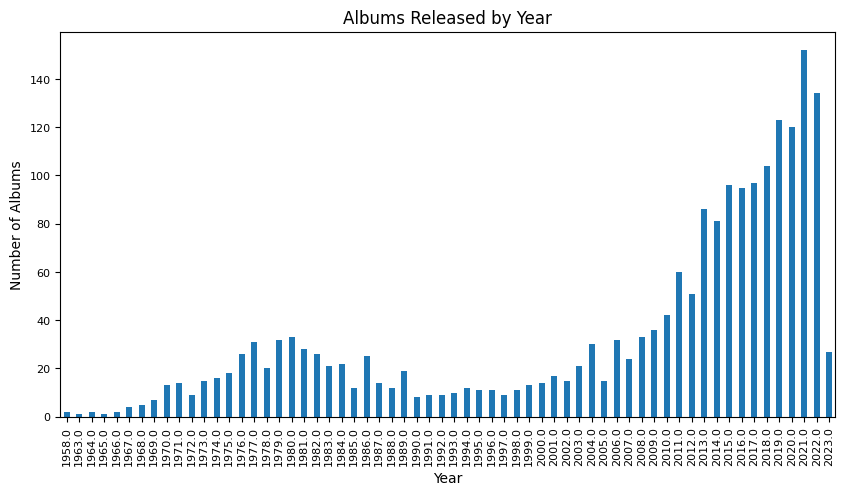

In [ ]:
# creating a bar plot
ax = album_info['release_year'].value_counts().sort_index().plot(kind='bar')

# set the title, x and y axis labels, and adjust font size
ax.set_title('Albums Released by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Albums')
ax.tick_params(axis='both', labelsize=8)

# increase the figure size
fig = plt.gcf()
fig.set_size_inches(10, 5)

# display the plot
plt.show()

After viewing our plot we see that within our dataframe the most popular year to release music was 2021. This concludes the making of album_info dataframe, the next steps are to get the top track info and then the features of each song.

## top_songs

Like said above this new section will be focused on extracting the top songs for each of our artists. We will start off the process doing the same thing but using the list of artist_ids to call the function sp.artist_top_tracks() on each id. From here I will then collect the data I want for my dataframe.

top_songs will have the columns:
*   song_id
*   song_name
*   album_id
*   artist_name
*   artist_id
*   explicit

**In this section I added the artist name column and added popularity column I also dropped the duration column, this differs from what is in the project part 2.**







In [ ]:
# empty list to append info I want to
top_tracks = []

# looping through the id's of all the artist to call the top_track function
for artist_id in artist_ids:
    tracks = sp.artist_top_tracks(artist_id)['tracks']
    # looping through the JSON data returne by the function
    for track in tracks:
        track_data = {
            'song_id': track['id'],
            'song_name': track['name'],
            'artist_id': artist_id,
            'artist_name': track['artists'][0]['name'],
            'album_id': track['album']['id'],
            'explicit': track['explicit'],
            'popularity': track['popularity']
        }
        top_tracks.append(track_data)
        # appending the data I extracted to the list

top_songs = pd.DataFrame(top_tracks)


In [ ]:
top_songs

,song_id,song_name,artist_id,artist_name,album_id,explicit,popularity
0,0zO8ctW0UiuOefR87OeJOZ,Collard Greens,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,78
1,5SsR3wtCOafDmZgvIdRhSm,Man Of The Year,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,72
2,29gsi1zZrZxdStACmTQB0Z,Studio,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,69
3,2kfpH2OAAdpk5J3JaraAIh,Hands On The Wheel,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,1C1mvUxPYGzTqVpXu6vOLf,True,61
4,6BKAKoo7J2vwJGZJs5dhGD,CrasH,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,3UTp6spxkyTdvsmJDPfb7n,True,67
...,...,...,...,...,...,...,...
1795,4CoSCPlKNrWli7E5kFtbcl,Little Lies - 2017 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,4AsXQ17Arq1cUVoa9dKJ3F,False,75
1796,4bEb3KE4mSKlTFjtWJQBqO,Don't Stop - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1bt6q2SruMsBtcerNVtpZB,False,76
1797,05oETzWbd4SI33qK2gbJfR,Rhiannon,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,5VIQ3VaAoRKOEpJ0fewdvo,False,75
1798,19Shlms2uTnOjIUg50TXzd,Never Going Back Again - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,0BwWUstDMUbgq2NYONRqlu,False,74


Now that I have my dataframe made I need to do some cleaning, I will filter out the artists that aren't in our artist_info dataframe and then I will drop any duplicates. I will also check if there are any NaN value or null values.

In [ ]:
top_songs = top_songs[top_songs['artist_name'].isin(artist_info['artist_name'])]

In [ ]:
top_songs

,song_id,song_name,artist_id,artist_name,album_id,explicit,popularity
0,0zO8ctW0UiuOefR87OeJOZ,Collard Greens,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,78
1,5SsR3wtCOafDmZgvIdRhSm,Man Of The Year,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,72
2,29gsi1zZrZxdStACmTQB0Z,Studio,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,69
3,2kfpH2OAAdpk5J3JaraAIh,Hands On The Wheel,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,1C1mvUxPYGzTqVpXu6vOLf,True,61
4,6BKAKoo7J2vwJGZJs5dhGD,CrasH,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,3UTp6spxkyTdvsmJDPfb7n,True,67
...,...,...,...,...,...,...,...
1795,4CoSCPlKNrWli7E5kFtbcl,Little Lies - 2017 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,4AsXQ17Arq1cUVoa9dKJ3F,False,75
1796,4bEb3KE4mSKlTFjtWJQBqO,Don't Stop - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1bt6q2SruMsBtcerNVtpZB,False,76
1797,05oETzWbd4SI33qK2gbJfR,Rhiannon,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,5VIQ3VaAoRKOEpJ0fewdvo,False,75
1798,19Shlms2uTnOjIUg50TXzd,Never Going Back Again - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,0BwWUstDMUbgq2NYONRqlu,False,74


In [ ]:
# checking if the artists match up
print(len(top_songs['artist_name'].unique()))

180


In [ ]:
# looking at artist_info name column
print(len(artist_info['artist_name']))

180


They match!

In [ ]:
# checking the shape before I drop duplicates
top_songs.shape

(1687, 7)

In [ ]:
# dropping duplicates
top_songs = top_songs.drop_duplicates(subset='song_id')

In [ ]:
# resseting the index after drop
top_songs = top_songs.reset_index(drop=True)

In [ ]:
# checking post drop shape
top_songs.shape

(1672, 7)

In [ ]:
# checking nuull values
print(top_songs.isnull().sum())

song_id        0
song_name      0
artist_id      0
artist_name    0
album_id       0
explicit       0
popularity     0
dtype: int64


In [ ]:
# checking NaN values
print(top_songs.isna().sum())

song_id        0
song_name      0
artist_id      0
artist_name    0
album_id       0
explicit       0
popularity     0
dtype: int64


After filtering out the artists I didn't have originally and dropping duplicate songs I am left with 1672 rows in the dataframe. I also checked to see if there were any null or NaN values and there were none. Next is to get the features of each top song.  

## top_songs_features

For this dataframe I will use a loop to get all the song features for each of the top songs. In the loop you will see the pd.json_normalize() function that I explored up above in the exploration section.


The data in the top_songs_features:
*   id
*   danceability
*   energy
*   Mode
*   speechiness
*   tempo
*   valence
*   duration


**Like said above I decided to have duration in this dataframe instead of the top_songs and keep key, loudness, acousticness, instramentalness, and liveness**






In [ ]:
# creating our dataframe
top_songs_features = pd.DataFrame()
# looping through to extract the data I want for each song
for i in range(len(top_songs)):
  top_track_feats = sp.audio_features(top_songs['song_id'][i])
  top_track_feats = pd.json_normalize(top_track_feats)
  top_track_feats = top_track_feats.drop(columns = ['uri', 'track_href', 'analysis_url', 'type','time_signature'])
  top_songs_features = pd.concat([top_songs_features, top_track_feats], ignore_index=True)

In [ ]:
top_songs_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.825,0.575,11,-4.870,1,0.0633,0.02500,0.000010,0.2050,0.650,153.954,0zO8ctW0UiuOefR87OeJOZ,299960
1,0.749,0.865,3,-5.228,1,0.0413,0.00536,0.000000,0.1980,0.371,111.914,5SsR3wtCOafDmZgvIdRhSm,216013
2,0.709,0.589,8,-7.776,0,0.0433,0.05070,0.000000,0.0585,0.580,133.922,29gsi1zZrZxdStACmTQB0Z,278067
3,0.650,0.859,1,-4.540,0,0.0957,0.02100,0.000000,0.0986,0.169,127.828,2kfpH2OAAdpk5J3JaraAIh,197800
4,0.825,0.644,1,-6.001,1,0.1750,0.03110,0.000000,0.0860,0.790,132.019,6BKAKoo7J2vwJGZJs5dhGD,161480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0.640,0.649,2,-10.345,1,0.0264,0.21600,0.000083,0.0551,0.865,124.825,4CoSCPlKNrWli7E5kFtbcl,221053
1668,0.671,0.710,9,-7.724,1,0.0356,0.03930,0.000011,0.0387,0.834,118.745,4bEb3KE4mSKlTFjtWJQBqO,193347
1669,0.723,0.490,9,-14.745,0,0.0296,0.11100,0.094600,0.0923,0.795,129.012,05oETzWbd4SI33qK2gbJfR,252773
1670,0.654,0.336,6,-12.825,1,0.0379,0.85800,0.385000,0.0786,0.947,176.083,19Shlms2uTnOjIUg50TXzd,134400


In [ ]:
#checking if the shape matches that of top_songs
top_songs_features.shape

(1672, 13)

In [ ]:
# shape of top_songs
top_songs.shape

(1672, 7)

The shapes match, next I'm going to make a new column which is duration in minutes.

In [ ]:
# checking the datatypes
top_songs_features.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
duration_ms           int64
dtype: object

In [ ]:
# making new column for duration_min
top_songs_features['duration_min'] = top_songs_features['duration_ms'] / 60000

In [ ]:
#rounding the minutes
top_songs_features['duration_min'] = top_songs_features['duration_min'].round(2)

In [ ]:
top_songs_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,duration_min
0,0.825,0.575,11,-4.870,1,0.0633,0.02500,0.000010,0.2050,0.650,153.954,0zO8ctW0UiuOefR87OeJOZ,299960,5.00
1,0.749,0.865,3,-5.228,1,0.0413,0.00536,0.000000,0.1980,0.371,111.914,5SsR3wtCOafDmZgvIdRhSm,216013,3.60
2,0.709,0.589,8,-7.776,0,0.0433,0.05070,0.000000,0.0585,0.580,133.922,29gsi1zZrZxdStACmTQB0Z,278067,4.63
3,0.650,0.859,1,-4.540,0,0.0957,0.02100,0.000000,0.0986,0.169,127.828,2kfpH2OAAdpk5J3JaraAIh,197800,3.30
4,0.825,0.644,1,-6.001,1,0.1750,0.03110,0.000000,0.0860,0.790,132.019,6BKAKoo7J2vwJGZJs5dhGD,161480,2.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0.640,0.649,2,-10.345,1,0.0264,0.21600,0.000083,0.0551,0.865,124.825,4CoSCPlKNrWli7E5kFtbcl,221053,3.68
1668,0.671,0.710,9,-7.724,1,0.0356,0.03930,0.000011,0.0387,0.834,118.745,4bEb3KE4mSKlTFjtWJQBqO,193347,3.22
1669,0.723,0.490,9,-14.745,0,0.0296,0.11100,0.094600,0.0923,0.795,129.012,05oETzWbd4SI33qK2gbJfR,252773,4.21
1670,0.654,0.336,6,-12.825,1,0.0379,0.85800,0.385000,0.0786,0.947,176.083,19Shlms2uTnOjIUg50TXzd,134400,2.24


## Joining my Data
For the next step I'm going to merge the top_songs and top_songs_features dataframes do some aggregations then do some plots.

In [ ]:
# merging the two dataframes to one
top_songs_merged = top_songs.merge(top_songs_features, left_on = 'song_id', right_on = 'id', how = 'left')

In [ ]:
# looking at what the new dataframe looks like
top_songs_merged

,song_id,song_name,artist_id,artist_name,album_id,explicit,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,duration_min
0,0zO8ctW0UiuOefR87OeJOZ,Collard Greens,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,78,0.825,0.575,11,...,1,0.0633,0.02500,0.000010,0.2050,0.650,153.954,0zO8ctW0UiuOefR87OeJOZ,299960,5.00
1,5SsR3wtCOafDmZgvIdRhSm,Man Of The Year,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,72,0.749,0.865,3,...,1,0.0413,0.00536,0.000000,0.1980,0.371,111.914,5SsR3wtCOafDmZgvIdRhSm,216013,3.60
2,29gsi1zZrZxdStACmTQB0Z,Studio,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,69,0.709,0.589,8,...,0,0.0433,0.05070,0.000000,0.0585,0.580,133.922,29gsi1zZrZxdStACmTQB0Z,278067,4.63
3,2kfpH2OAAdpk5J3JaraAIh,Hands On The Wheel,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,1C1mvUxPYGzTqVpXu6vOLf,True,61,0.650,0.859,1,...,0,0.0957,0.02100,0.000000,0.0986,0.169,127.828,2kfpH2OAAdpk5J3JaraAIh,197800,3.30
4,6BKAKoo7J2vwJGZJs5dhGD,CrasH,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,3UTp6spxkyTdvsmJDPfb7n,True,67,0.825,0.644,1,...,1,0.1750,0.03110,0.000000,0.0860,0.790,132.019,6BKAKoo7J2vwJGZJs5dhGD,161480,2.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,4CoSCPlKNrWli7E5kFtbcl,Little Lies - 2017 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,4AsXQ17Arq1cUVoa9dKJ3F,False,75,0.640,0.649,2,...,1,0.0264,0.21600,0.000083,0.0551,0.865,124.825,4CoSCPlKNrWli7E5kFtbcl,221053,3.68
1668,4bEb3KE4mSKlTFjtWJQBqO,Don't Stop - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1bt6q2SruMsBtcerNVtpZB,False,76,0.671,0.710,9,...,1,0.0356,0.03930,0.000011,0.0387,0.834,118.745,4bEb3KE4mSKlTFjtWJQBqO,193347,3.22
1669,05oETzWbd4SI33qK2gbJfR,Rhiannon,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,5VIQ3VaAoRKOEpJ0fewdvo,False,75,0.723,0.490,9,...,0,0.0296,0.11100,0.094600,0.0923,0.795,129.012,05oETzWbd4SI33qK2gbJfR,252773,4.21
1670,19Shlms2uTnOjIUg50TXzd,Never Going Back Again - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,0BwWUstDMUbgq2NYONRqlu,False,74,0.654,0.336,6,...,1,0.0379,0.85800,0.385000,0.0786,0.947,176.083,19Shlms2uTnOjIUg50TXzd,134400,2.24


In [ ]:
# checking the shape
top_songs_merged.shape

(1672, 21)

The number of rows match that of both top_songs and top_songs_features. Now I'm going to do a little filtering and agrregating.

In [ ]:
# filtering out songs that are explicit
top_songs_merged[top_songs_merged['explicit'] == False]

,song_id,song_name,artist_id,artist_name,album_id,explicit,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,duration_min
16,40giNwfX1pR3smltxvs3dB,Misfit Toys (from the series Arcane League of ...,0ONHkAv9pCAFxb0zJwDNTy,Pusha T,5qQkzCr8H5NyzkzVKlGGMm,False,55,0.650,0.6750,1,...,1,0.1940,0.00681,0.000000,0.0989,0.368,99.860,40giNwfX1pR3smltxvs3dB,189692,3.16
67,2OQJKTtrH482waGFmOfJni,We Own It (Fast & Furious),17lzZA2AlOHwCwFALHttmp,2 Chainz,35KyVKa5AMTaOBxSzjSBbK,False,71,0.563,0.9020,1,...,0,0.4020,0.05450,0.000000,0.0524,0.559,171.999,2OQJKTtrH482waGFmOfJni,227907,3.80
93,3xKsf9qdS1CyvXSMEid6g8,Pink + White,2h93pZq0e7k5yf4dywlkpM,Frank Ocean,3mH6qwIy9crq0I9YQbOuDf,False,88,0.545,0.5450,9,...,1,0.1070,0.66700,0.000055,0.4170,0.549,159.940,3xKsf9qdS1CyvXSMEid6g8,184516,3.08
98,7DfFc7a6Rwfi3YQMRbDMau,Thinkin Bout You,2h93pZq0e7k5yf4dywlkpM,Frank Ocean,392p3shh2jkxUxY2VHvlH8,False,80,0.721,0.3390,0,...,1,0.0532,0.40900,0.001530,0.0973,0.200,129.830,7DfFc7a6Rwfi3YQMRbDMau,200747,3.35
99,2LMkwUfqC6S6s6qDVlEuzV,White Ferrari,2h93pZq0e7k5yf4dywlkpM,Frank Ocean,3mH6qwIy9crq0I9YQbOuDf,False,79,0.501,0.0958,0,...,1,0.0433,0.77000,0.000000,0.2980,0.204,108.741,2LMkwUfqC6S6s6qDVlEuzV,248808,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,4CoSCPlKNrWli7E5kFtbcl,Little Lies - 2017 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,4AsXQ17Arq1cUVoa9dKJ3F,False,75,0.640,0.6490,2,...,1,0.0264,0.21600,0.000083,0.0551,0.865,124.825,4CoSCPlKNrWli7E5kFtbcl,221053,3.68
1668,4bEb3KE4mSKlTFjtWJQBqO,Don't Stop - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1bt6q2SruMsBtcerNVtpZB,False,76,0.671,0.7100,9,...,1,0.0356,0.03930,0.000011,0.0387,0.834,118.745,4bEb3KE4mSKlTFjtWJQBqO,193347,3.22
1669,05oETzWbd4SI33qK2gbJfR,Rhiannon,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,5VIQ3VaAoRKOEpJ0fewdvo,False,75,0.723,0.4900,9,...,0,0.0296,0.11100,0.094600,0.0923,0.795,129.012,05oETzWbd4SI33qK2gbJfR,252773,4.21
1670,19Shlms2uTnOjIUg50TXzd,Never Going Back Again - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,0BwWUstDMUbgq2NYONRqlu,False,74,0.654,0.3360,6,...,1,0.0379,0.85800,0.385000,0.0786,0.947,176.083,19Shlms2uTnOjIUg50TXzd,134400,2.24


Seeing what songs aren't explicit can help you determine what songs to play when you have a younger audience. You can also filter to see what longer songs are in the dataframe

In [ ]:
top_songs_merged[top_songs_merged['duration_min'] >= 4]

,song_id,song_name,artist_id,artist_name,album_id,explicit,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,duration_min
0,0zO8ctW0UiuOefR87OeJOZ,Collard Greens,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,78,0.825,0.575,11,...,1,0.0633,0.02500,0.000010,0.2050,0.650,153.954,0zO8ctW0UiuOefR87OeJOZ,299960,5.00
2,29gsi1zZrZxdStACmTQB0Z,Studio,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,69,0.709,0.589,8,...,0,0.0433,0.05070,0.000000,0.0585,0.580,133.922,29gsi1zZrZxdStACmTQB0Z,278067,4.63
6,4LmAnpjlhWTahvRkYR8xJa,X (with 2 Chainz & Saudi),5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,3pLdWdkj83EYfDN6H2N8MR,True,65,0.768,0.471,2,...,1,0.2590,0.02010,0.000000,0.2680,0.405,131.023,4LmAnpjlhWTahvRkYR8xJa,267427,4.46
7,2yJ9GVCLMmzBBfQAnfzlwr,THat Part,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,0YbpATCIng8Fz2JrfHmEf7,True,62,0.927,0.535,6,...,0,0.0911,0.08550,0.000000,0.1360,0.336,112.960,2yJ9GVCLMmzBBfQAnfzlwr,313573,5.23
20,2N3U8uTYhjX2KwGT0pf5x0,"Everyday (feat. Rod Stewart, Miguel & Mark Ron...",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,3arNdjotCvtiiLFfjKngMc,True,77,0.394,0.661,4,...,1,0.1920,0.00996,0.000000,0.3430,0.335,149.818,2N3U8uTYhjX2KwGT0pf5x0,260987,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,4llK75pXNWZz6KAho2Gp16,She Will Be Loved - Radio Mix,04gDigrS5kc9YWfZHwBETP,Maroon 5,5zClcGCSWj926AMjvBNSLc,False,80,0.651,0.663,0,...,0,0.0281,0.22800,0.000000,0.0994,0.465,102.000,4llK75pXNWZz6KAho2Gp16,259453,4.32
1662,0ofHAoxe9vBkTCp2UQIavz,Dreams - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,0BwWUstDMUbgq2NYONRqlu,False,85,0.828,0.492,0,...,1,0.0276,0.06440,0.004280,0.1280,0.789,120.151,0ofHAoxe9vBkTCp2UQIavz,257800,4.30
1663,5e9TFTbltYBg2xThimr0rU,The Chain - 2004 Remaster,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,0BwWUstDMUbgq2NYONRqlu,False,83,0.545,0.670,9,...,1,0.0496,0.00900,0.000822,0.0451,0.481,151.553,5e9TFTbltYBg2xThimr0rU,270213,4.50
1669,05oETzWbd4SI33qK2gbJfR,Rhiannon,08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,5VIQ3VaAoRKOEpJ0fewdvo,False,75,0.723,0.490,9,...,0,0.0296,0.11100,0.094600,0.0923,0.795,129.012,05oETzWbd4SI33qK2gbJfR,252773,4.21


In [ ]:
# lets see what the most popular song is in the dataframe
top_songs_merged[top_songs_merged['popularity'] == top_songs_merged['popularity'].max()]

,song_id,song_name,artist_id,artist_name,album_id,explicit,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,duration_min
1310,4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,5Pwc4xIPtQLFEnJriah9YJ,OneRepublic,04PEOM6kIEeq9lRp1asNP2,False,93,0.704,0.797,0,...,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4h9wh7iOZ0GGn8QVp4RAOB,148486,2.47


## Aggregtions

Now I will do a few aggregations, those aggregations will be for total danceability of each artist and I will aggregate based on average tempo and average duration.

In [ ]:
# total danceability
best_dancing = top_songs_merged.groupby(['artist_name','artist_id']).agg({'danceability': 'sum'})

# reset the index
best_dancing = best_dancing.reset_index()

# look at the aggregated dataframe
best_dancing

,artist_name,artist_id,danceability
0,+44,7gkRNHOOt7QfhhXf0rEnmj,4.505
1,2 Chainz,17lzZA2AlOHwCwFALHttmp,4.561
2,21 Savage,1URnnhqYAYcrqrcwql10ft,3.395
3,24kGoldn,6ASri4ePR7RlsvIQgWPJpS,1.422
4,24kGoldn,6fWVd57NKTalqvmjRd2t8Z,2.823
...,...,...,...
200,benny blanco,5CiGnKThu5ctn9pBxv7DGa,5.237
201,blink-182,6FBDaR13swtiWwGhX1WQsP,4.960
202,iann dior,6ASri4ePR7RlsvIQgWPJpS,4.065
203,mike.,5G9kmDLg3OeUyj8KVBLzbu,7.480


In [ ]:
# dropping duplicate artists
best_dancing = best_dancing.drop_duplicates(subset='artist_name')

In [ ]:
# resetting index
best_dancing = best_dancing.reset_index(drop=True)

In [ ]:
# checking shape
best_dancing.shape

(180, 3)

In [ ]:
# look at dataframe

best_dancing

,artist_name,artist_id,danceability
0,+44,7gkRNHOOt7QfhhXf0rEnmj,4.505
1,2 Chainz,17lzZA2AlOHwCwFALHttmp,4.561
2,21 Savage,1URnnhqYAYcrqrcwql10ft,3.395
3,24kGoldn,6ASri4ePR7RlsvIQgWPJpS,1.422
4,A$AP Mob,7yO4IdJjCEPz7YgZMe25iS,8.077
...,...,...,...
175,benny blanco,5CiGnKThu5ctn9pBxv7DGa,5.237
176,blink-182,6FBDaR13swtiWwGhX1WQsP,4.960
177,iann dior,6ASri4ePR7RlsvIQgWPJpS,4.065
178,mike.,5G9kmDLg3OeUyj8KVBLzbu,7.480


Now that we have this aggregated dataframe we can answer the question of if you were an owner of a nightclub what artists in this dataframe  would be the best to put on your playlist. Since danceability is onn a scale of 1-10 I'm going to filter out the artists who are less than 7 so we can get an above averge play list going.

In [ ]:
best_dancing[best_dancing['danceability'] >= 7]

,artist_name,artist_id,danceability
4,A$AP Mob,7yO4IdJjCEPz7YgZMe25iS,8.077
17,Bankrol Hayden,0Yr4BBpK2dkCp2UsrJ9LZN,8.144
27,CHIC,0Xf8oDAJYd2D0k3NLI19OV,7.079
28,Cameo,545idYhdloaSlLGBY8E9u2,7.948
39,Daryl Hall & John Oates,77tT1kLj6mCWtFNqiOmP9H,7.271
82,KC & The Sunshine Band,3mQBpAOMWYqAZyxtyeo4Lo,7.334
86,Kool & The Gang,3VNITwohbvU5Wuy5PC6dsI,7.294
90,Lil Tecca,4Ga1P7PMIsmqEZqhYZQgDo,7.523
97,NAV,7rkW85dBwwrJtlHRDkJDAC,7.751
112,Rick James,0FrpdcVlJQqibaz5HfBUrL,7.006


Here are some great artists to build that dancing playlist off of. Next I want to create an aggregated dataframe based on average tempo and duration of each artist. This will be able to show how if longer artists have a who make more upbeat songs typically make longer or shorter songs.

In [ ]:
#making the dataframe
tempo_vs_duration = top_songs_merged.groupby(['artist_name','artist_id'], as_index = False).agg({'tempo':['mean'],'duration_min':['mean']})

In [ ]:
tempo_vs_duration

,artist_name,artist_id,tempo,duration_min
,,,mean,mean
0,+44,7gkRNHOOt7QfhhXf0rEnmj,151.79650,3.646000
1,2 Chainz,17lzZA2AlOHwCwFALHttmp,107.61100,3.601667
2,21 Savage,1URnnhqYAYcrqrcwql10ft,139.25125,3.640000
3,24kGoldn,6ASri4ePR7RlsvIQgWPJpS,90.99750,2.775000
4,24kGoldn,6fWVd57NKTalqvmjRd2t8Z,133.51800,2.355000
...,...,...,...,...
200,benny blanco,5CiGnKThu5ctn9pBxv7DGa,121.44450,2.947500
201,blink-182,6FBDaR13swtiWwGhX1WQsP,141.46040,3.108000
202,iann dior,6ASri4ePR7RlsvIQgWPJpS,118.45450,2.161667


In [ ]:
# renaming the columns
tempo_vs_duration.columns = ['artist_name','artist_id','avg_tempo','avg_duration_min']

In [ ]:
#dropping duplicates
tempo_vs_duration = tempo_vs_duration.drop_duplicates(subset='artist_name')

In [ ]:
# resetting index
tempo_vs_duration = tempo_vs_duration.reset_index(drop=True)

In [ ]:
tempo_vs_duration

,artist_name,artist_id,avg_tempo,avg_duration_min
0,+44,7gkRNHOOt7QfhhXf0rEnmj,151.79650,3.646000
1,2 Chainz,17lzZA2AlOHwCwFALHttmp,107.61100,3.601667
2,21 Savage,1URnnhqYAYcrqrcwql10ft,139.25125,3.640000
3,24kGoldn,6ASri4ePR7RlsvIQgWPJpS,90.99750,2.775000
4,A$AP Mob,7yO4IdJjCEPz7YgZMe25iS,114.43020,3.674000
...,...,...,...,...
175,benny blanco,5CiGnKThu5ctn9pBxv7DGa,121.44450,2.947500
176,blink-182,6FBDaR13swtiWwGhX1WQsP,141.46040,3.108000
177,iann dior,6ASri4ePR7RlsvIQgWPJpS,118.45450,2.161667
178,mike.,5G9kmDLg3OeUyj8KVBLzbu,103.88940,2.985000


Now that we have our aggregated dataframe I'm going to make a scatterplot of the values to visualize better what this data looks like

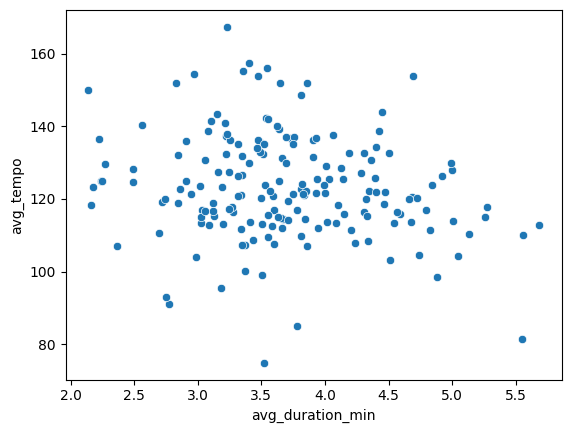

In [ ]:
import seaborn as sns
plot = sns.scatterplot(data = tempo_vs_duration,
                       x = 'avg_duration_min',
                       y = 'avg_tempo')
plt.show()

After looking at the plot we see that typically the higher tempo songs are shorter in duration. we see this because the majority of the points are in the upper left of the plot. This conccludes my data extraction and transform section of my project the next steps is to load my dataframes into the AWS and do a few queries.

# Loading Data

For this section I'm going to load all the main dataframes I made into the AWS. First I must connect to my AWS in order to load the data in. I will demonstrate that in the cell below.

In [ ]:
import psycopg2
def get_conn_cur():


 conn = psycopg2.connect(
    host="database-2.c2usjdvnfnhz.us-west-2.rds.amazonaws.com",
    database="hw3_db",
    user="ianstewart",
    password="blacktiger156",
    port='5432'
    )

 cur = conn.cursor()
 return(conn, cur)

Now that we are connected to my AWS we need to import and create all the functions for SQL from past notebooks.

In [ ]:
def run_query(query_string):

 conn, cur = get_conn_cur() # get connection and cursor

 cur.execute(query_string) # executing string as before

 my_data = cur.fetchall() # fetch query data as before

 # here we're extracting the 0th element for each item in cur.description
 colnames = [desc[0] for desc in cur.description]

 cur.close() # close
 conn.close() # close

 return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query) # exectue
 my_data = cur.fetchall() # store

 cur.close() # close
 conn.close() # close

 return(my_data) # return

# Check table_names
def get_table_names():
 conn, cur = get_conn_cur() # get connection and cursor

 # query to get table names
 table_name_query = """SELECT table_name FROM information_schema.tables """

 cur.execute(table_name_query) # execute
 my_data = cur.fetchall() # fetch results

 cur.close() #close cursor
 conn.close() # close connection

 return(my_data) # return your fetched results

# make sql_head function
def sql_head(table_name):
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) # exectue
 colnames = [desc[0] for desc in cur.description] # get column names
 my_data = cur.fetchall() # store first five rows

 cur.close() # close
 conn.close() # close

 df = pd.DataFrame(data = my_data, columns = colnames) # make into df

 return(df) # return

I'm also gonna import numpy becasue I will use that to add my data to the tables in the AWS

In [ ]:
import numpy as np

Ok now that all that is out the way it is time to make the tables. The 4 tables I will make in the AWS will be:

*   artist_info
*   album_info
*   top_songs
*   top_songs_featuress

The first table I will start creating will be artist_info



### artist_info table

In [ ]:
# creating artist_info table
table1 = """CREATE TABLE artist_info
         (artist_id VARCHAR(255) PRIMARY KEY,
         artist_name VARCHAR(255) NOT NULL,
         popularity INT NOT NULL,
         followers BIGINT NOT NULL,
         genre VARCHAR(255) NOT NULL);"""

In [ ]:
conn, cur = get_conn_cur()

In [ ]:
cur.execute(table1)

In [ ]:
conn.commit()

In [ ]:
# making the tuples of each row in the dataframe
artist_info_np = artist_info.to_numpy()
artist_info_np[:,1] = np.vectorize(lambda x: str(x))(artist_info_np[:,1])
dt = [tuple(x) for x in artist_info_np]

In [ ]:
# checking to see what the tuple looks like
print(dt[0])

('ScHoolboy Q', '5IcR3N7QB1j6KBL8eImZ8m', 73, 4476788, 'gangster rap')


The tuple didn't match the order of the dataframe, it was mixing artist_name andd artist_id. I will make a new tuple to fix the order

In [ ]:
# looping through the tuples to fix the order
new_dt = []
for info in dt:
  new_dt.append((info[1],info[0],info[2],info[3],info[4]))

In [ ]:
#checking to see the order is now correct
print(new_dt[0])

('5IcR3N7QB1j6KBL8eImZ8m', 'ScHoolboy Q', 73, 4476788, 'gangster rap')


In [ ]:
# making an insert statement so the data from the tuple can get loaded in
iq = """INSERT INTO artist_info(artist_id, artist_name, popularity, followers, genre) VALUES(%s, %s, %s, %s, %s)"""

In [ ]:
# loading the data into the table
conn, cur = get_conn_cur()
cur.executemany(iq, new_dt)
conn.commit()
conn.close()

In [ ]:
# looking at the head of the table to see everything is right
sql_head(table_name='artist_info')

,artist_id,artist_name,popularity,followers,genre
0,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,73,4476788,gangster rap
1,0ONHkAv9pCAFxb0zJwDNTy,Pusha T,72,2749548,gangster rap
2,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,82,12168217,east coast hip hop
3,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,87,19960995,conscious hip hop
4,0g9vAlRPK9Gt3FKCekk4TW,Ab-Soul,59,1023161,conscious hip hop


For the next tables they will follow the same steps as above.

1.   creating the table into the AWS
2.   Creating tuple of the dataframe
3.   Creating an insert statement
4.   loading the tuples of data into our table in thee AWS



### album_info table

In [ ]:
table2 = """CREATE TABLE album_info (
         album_name VARCHAR(255) NOT NULL,
         album_id VARCHAR(255) PRIMARY KEY,
         total_tracks INT NOT NULL,
         release_date VARCHAR(255) NOT NULL,
         artist_name VARCHAR(255) NOT NULL,
         artist_id VARCHAR(255) NOT NULL,
         release_year FLOAT NOT NULL);
         """

In [ ]:
# don't rerun after running the first time
cur.execute(table2)

In [ ]:
conn.commit()

In [ ]:
album_info_np = album_info.to_numpy()
dt = [tuple(x) for x in album_info_np]

In [ ]:
print(dt[0])

('CrasH Talk', '3UTp6spxkyTdvsmJDPfb7n', 14, '2019-04-26', 'ScHoolboy Q', '5IcR3N7QB1j6KBL8eImZ8m', 2019.0)


In [ ]:
iq = """INSERT INTO album_info (album_name, album_id, total_tracks,release_date,artist_name, artist_id, release_year) VALUES(%s,%s,%s,%s,%s,%s,%s)"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, dt)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='album_info')

,album_name,album_id,total_tracks,release_date,artist_name,artist_id,release_year
0,CrasH Talk,3UTp6spxkyTdvsmJDPfb7n,14,2019-04-26,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2019.0
1,Blank Face LP,0YbpATCIng8Fz2JrfHmEf7,17,2016-07-08,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2016.0
2,Oxymoron (Deluxe),7Et3bSTLLqdABO1qCxUplS,15,2014-01-01,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2014.0
3,Oxymoron,3WrybrSHu1vSZaQegAZTyn,12,2014-01-01,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2014.0
4,Habits & Contradictions,6Xz8eKy8TeAyzwGr8QSOAS,15,2012-01-14,ScHoolboy Q,5IcR3N7QB1j6KBL8eImZ8m,2012.0


### top_songs table

In [ ]:
table3 = """CREATE TABLE top_songs
            (song_id VARCHAR(255) PRIMARY KEY,
            song_name VARCHAR(255) NOT NULL,
            artist_id VARCHAR(255) NOT NULL,
            artist_name VARCHAR(255) NOT NULL,
            album_id VARCHAR(255) NOT NULL,
            explicit BOOL NOT NULL,
            popularity INT NOT NULL);"""

In [ ]:
conn, cur = get_conn_cur()

In [ ]:
cur.execute(table3)

In [ ]:
conn.commit()

In [ ]:
top_songs_np = top_songs.to_numpy()
dt = [tuple(x) for x in top_songs_np]

In [ ]:
print(dt[0])

('0zO8ctW0UiuOefR87OeJOZ', 'Collard Greens', '5IcR3N7QB1j6KBL8eImZ8m', 'ScHoolboy Q', '7Et3bSTLLqdABO1qCxUplS', True, 78)


In [ ]:
iq = """INSERT INTO top_songs(song_id,song_name,artist_id,artist_name,album_id,explicit,popularity) VALUES(%s,%s,%s,%s,%s,%s,%s)"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, dt)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='top_songs')

,song_id,song_name,artist_id,artist_name,album_id,explicit,popularity
0,0zO8ctW0UiuOefR87OeJOZ,Collard Greens,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,78
1,5SsR3wtCOafDmZgvIdRhSm,Man Of The Year,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,72
2,29gsi1zZrZxdStACmTQB0Z,Studio,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,7Et3bSTLLqdABO1qCxUplS,True,69
3,2kfpH2OAAdpk5J3JaraAIh,Hands On The Wheel,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,1C1mvUxPYGzTqVpXu6vOLf,True,61
4,6BKAKoo7J2vwJGZJs5dhGD,CrasH,5IcR3N7QB1j6KBL8eImZ8m,ScHoolboy Q,3UTp6spxkyTdvsmJDPfb7n,True,67


### top_songs_features table

In [ ]:
top_songs_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,duration_min
0,0.825,0.575,11,-4.870,1,0.0633,0.02500,0.00001,0.2050,0.650,153.954,0zO8ctW0UiuOefR87OeJOZ,299960,5.00
1,0.749,0.865,3,-5.228,1,0.0413,0.00536,0.00000,0.1980,0.371,111.914,5SsR3wtCOafDmZgvIdRhSm,216013,3.60
2,0.709,0.589,8,-7.776,0,0.0433,0.05070,0.00000,0.0585,0.580,133.922,29gsi1zZrZxdStACmTQB0Z,278067,4.63
3,0.650,0.859,1,-4.540,0,0.0957,0.02100,0.00000,0.0986,0.169,127.828,2kfpH2OAAdpk5J3JaraAIh,197800,3.30
4,0.825,0.644,1,-6.001,1,0.1750,0.03110,0.00000,0.0860,0.790,132.019,6BKAKoo7J2vwJGZJs5dhGD,161480,2.69


In [ ]:
table4 = """CREATE TABLE top_songs_features
          (danceability FLOAT NOT NULL,
          energy FLOAT NOT NULL,
          key INT NOT NULL,
          loudness FLOAT NOT NULL,
          mode INT NOT NULL,
          speechiness FLOAT NOT NULL,
          acousticness FLOAT NOT NULL,
          instrumentalness FLOAT NOT NULL,
          liveness FLOAT NOT NULL,
          valence FLOAT NOT NULL,
          tempo FLOAT NOT NULL,
          id VARCHAR(255) PRIMARY KEY,
          duration_ms INT NOT NULL,
          duration_min FLOAT NOT NULL
          );"""

In [ ]:
conn, cur = get_conn_cur()

In [ ]:
cur.execute(table4)

In [ ]:
conn.commit()

In [ ]:
top_songs_features_np = top_songs_features.to_numpy()
dt = [tuple(x) for x in top_songs_features_np]

In [ ]:
print(dt[0])

(0.825, 0.575, 11, -4.87, 1, 0.0633, 0.025, 9.94e-06, 0.205, 0.65, 153.954, '0zO8ctW0UiuOefR87OeJOZ', 299960, 5.0)


In [ ]:
iq = """INSERT INTO top_songs_features(danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,duration_min) VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, dt)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='top_songs_features')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,duration_min
0,0.825,0.575,11,-4.870,1,0.0633,0.02500,0.00001,0.2050,0.650,153.954,0zO8ctW0UiuOefR87OeJOZ,299960,5.00
1,0.749,0.865,3,-5.228,1,0.0413,0.00536,0.00000,0.1980,0.371,111.914,5SsR3wtCOafDmZgvIdRhSm,216013,3.60
2,0.709,0.589,8,-7.776,0,0.0433,0.05070,0.00000,0.0585,0.580,133.922,29gsi1zZrZxdStACmTQB0Z,278067,4.63
3,0.650,0.859,1,-4.540,0,0.0957,0.02100,0.00000,0.0986,0.169,127.828,2kfpH2OAAdpk5J3JaraAIh,197800,3.30
4,0.825,0.644,1,-6.001,1,0.1750,0.03110,0.00000,0.0860,0.790,132.019,6BKAKoo7J2vwJGZJs5dhGD,161480,2.69


Now that I've all the tables and loaded them into my AWS I will query the data. I will do 5 queries to show the potential of this database.

## SQL Queries

In [ ]:
sq = """SELECT artist_info.artist_name, AVG(top_songs.popularity) as avg_popularity, artist_info.genre
        FROM top_songs
        JOIN artist_info ON top_songs.artist_id = artist_info.artist_id
        GROUP BY artist_info.artist_name, artist_info.genre
        ORDER BY avg_popularity DESC
        LIMIT 10;"""

In [ ]:
run_query(sq)

(['artist_name', 'avg_popularity', 'genre'],
 [('Drake', Decimal('86.8000000000000000'), 'canadian hip hop'),
  ('21 Savage', Decimal('84.8750000000000000'), 'atl hip hop'),
  ('Kendrick Lamar', Decimal('83.0000000000000000'), 'conscious hip hop'),
  ('Tyler, The Creator', Decimal('82.2000000000000000'), 'hip hop'),
  ('Frank Ocean', Decimal('81.7777777777777778'), 'lgbtq+ hip hop'),
  ('J. Cole', Decimal('81.4444444444444444'), 'conscious hip hop'),
  ('Future', Decimal('81.0000000000000000'), 'atl hip hop'),
  ('Shawn Mendes', Decimal('79.3000000000000000'), 'canadian pop'),
  ('Maroon 5', Decimal('78.5000000000000000'), 'pop'),
  ('Fleetwood Mac', Decimal('78.2000000000000000'), 'album rock')])

This query answers the question of what are the some of the most popular genres in my database. I averaged out each of the artitst popularity score in the query. You can see that the most popular on average is drake and he is under the canadian hip hop genre which is just a subgenre of hip hop itself. Therefore hip hop is ont of the most popular genres in our databaes. You can also see this by looking at the other genres that are subgenres of hip hop as well.

In [ ]:
sq = """SELECT artist_name, AVG(duration_min) AS avg_duration
        FROM top_songs_features
        JOIN top_songs ON top_songs_features.id = top_songs.song_id
        GROUP BY top_songs.artist_id, artist_name
        ORDER BY avg_duration DESC
        LIMIT 10;"""

In [ ]:
run_query(sq)

(['artist_name', 'avg_duration'],
 [('DJ Khaled', 8.36),
  ('Tom Petty', 6.34),
  ('CHIC', 5.684444444444444),
  ('Don Henley', 5.558888888888889),
  ('Eric Clapton', 5.55),
  ('Deep Purple', 5.273000000000001),
  ('The Gap Band', 5.256),
  ('The Whispers', 5.135),
  ('Cameo', 5.045999999999999),
  ('Rick James', 5.005000000000001)])

This query lets us see what artists typically make longer songs on average. This can help you determine what songs you might want on a road trip playlist so you don't run out of music to listen to.

In [ ]:
sq = """SELECT artist_name, COUNT(*) as num_songs
FROM top_songs
GROUP BY artist_name
ORDER BY num_songs DESC
LIMIT 10;"""

In [ ]:
run_query(sq)

(['artist_name', 'num_songs'],
 [('Tyler, The Creator', 13),
  ('J. Cole', 12),
  ('Drake', 12),
  ('DJ Khaled', 11),
  ('Isaiah Rashad', 11),
  ('Queen', 11),
  ('Tom Petty', 11),
  ('Bob Dylan', 11),
  ('Shawn Mendes', 11),
  ('Eric Clapton', 11)])

This query looks at the top ten artists with the most songs in the database. No artist has more than 13 songs and Tyler The Creator has the most songs. Since these songs come from the top_songs table this must mean that Tyler The Creator has a lot of popular songs

In [ ]:
sq = """SELECT artist_name, COUNT(DISTINCT album_id) as num_albums
FROM album_info
GROUP BY artist_name
ORDER BY num_albums DESC;"""

In [ ]:
run_query(sq)

(['artist_name', 'num_albums'],
 [('Donovan', 20),
  ('The Beach Boys', 20),
  ('Fleetwood Mac', 20),
  ('Elvis Presley', 20),
  ('Kool & The Gang', 20),
  ('Average White Band', 20),
  ('Paul McCartney', 20),
  ('Ringo Starr', 20),
  ('Billy Joel', 20),
  ('The Spinners', 20),
  ('Steve Miller Band', 20),
  ('KC & The Sunshine Band', 20),
  ('The Hollies', 20),
  ('David Bowie', 20),
  ('Rick James', 19),
  ('Curren$y', 19),
  ('Bob Dylan', 19),
  ('Led Zeppelin', 19),
  ('The Rolling Stones', 19),
  ('Cameo', 19),
  ('Steely Dan', 19),
  ('Tavares', 19),
  ('Electric Light Orchestra', 19),
  ('The Beatles', 19),
  ('Chuck Berry', 19),
  ('Paul Simon', 19),
  ('America', 19),
  ('Van Morrison', 18),
  ('John Mellencamp', 18),
  ('Aerosmith', 18),
  ('Ohio Players', 18),
  ('The Byrds', 18),
  ('Stevie Nicks', 18),
  ('John Lennon', 18),
  ("The O'Jays", 18),
  ('Roy Orbison', 18),
  ('Commodores', 17),
  ('Jackson Browne', 17),
  ('The Cars', 17),
  ('Freddie Gibbs', 17),
  ('The Gap 

This query counts up the number of albums each artist have. The query returns in descending order so at the top is the artist with the most nuumber of albums within the database, in this case 14-way tie of 20 albums.

In [ ]:
sq = """SELECT artist_name, COUNT(*) AS num_explicit_songs
FROM top_songs
WHERE explicit = True
GROUP BY artist_name
ORDER BY num_explicit_songs DESC;"""

In [ ]:
run_query(sq)

(['artist_name', 'num_explicit_songs'],
 [('Tyler, The Creator', 13),
  ('J. Cole', 12),
  ('Isaiah Rashad', 11),
  ('Drake', 11),
  ('Lil Skies', 10),
  ('Tyla Yaweh', 10),
  ('A$AP Mob', 10),
  ('NAV', 10),
  ('Bankrol Hayden', 10),
  ('YNW Melly', 10),
  ('Meek Mill', 10),
  ('Unodavid', 10),
  ('Arizona Zervas', 10),
  ('DJ Khaled', 10),
  ('Freddie Gibbs', 10),
  ('Jay Rock', 9),
  ('Internet Money', 9),
  ('BROCKHAMPTON', 9),
  ('ScHoolboy Q', 9),
  ('Joey Bada$$', 9),
  ('Earl Sweatshirt', 9),
  ('Lil Tecca', 9),
  ('Spillage Village', 9),
  ('mike.', 9),
  ('Ab-Soul', 9),
  ('Kendrick Lamar', 8),
  ('PARTYNEXTDOOR', 8),
  ('Yung Pinch', 8),
  ('Curren$y', 8),
  ('The Kid LAROI', 8),
  ('Gucci Mane', 8),
  ('Polo G', 8),
  ('Mac Miller', 8),
  ('Tory Lanez', 7),
  ('Quavo', 7),
  ('Lil Mosey', 7),
  ('Pusha T', 7),
  ('Childish Gambino', 7),
  ('Migos', 7),
  ('Vince Staples', 6),
  ('Chance the Rapper', 6),
  ('Kid Cudi', 6),
  ('Frank Ocean', 6),
  ('Chri$tian Gate$', 6),
  ('

This query counts up the number of songs that are explicit per artist. This query also is in descending order so you can see which artists cuss more or less in their songs. This is perfect to see what artists would be better for children to take a look at.

# Conclusion

In my project I went through the whole ETL process using the spotify API. I extraced data using a number of built in functions and compiled dataframes with the data. Then I cleaned the dataframes by dropping dupicates, dropping NaN/NUll values, and droppped artists who weren't in the main artist_info dataframe. From here I did a few aggregations and plots to answer some question from my Part.1 of the project. I then loaded the dataframes into the AWS and my database. After that I queried some of the data to answer more questions. Throughout the project I kept true to the process I intended as I wrote in project parts 1 and 2. I didn't make any drastic changes and the changes I made that are seen in BOLD lettering throughout the poject. I really enjoyed exploring the Spotify API and hope you enjoyed reading through everything.

 Thank You
    Ian.